In [73]:
import time
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd

In [74]:
df = pd.read_csv('data/BreadBasket_DMS.csv')

transactions = df.groupby('Transaction')['Item'].apply(list).tolist()
for i in transactions:
    print(i)

['Bread']
['Scandinavian', 'Scandinavian']
['Hot chocolate', 'Jam', 'Cookies']
['Muffin']
['Coffee', 'Pastry', 'Bread']
['Medialuna', 'Pastry', 'Muffin']
['Medialuna', 'Pastry', 'Coffee', 'Tea']
['Pastry', 'Bread']
['Bread', 'Muffin']
['Scandinavian', 'Medialuna']
['Bread', 'Medialuna', 'Bread', 'NONE']
['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea']
['Basket', 'Bread', 'Coffee']
['Bread', 'Medialuna', 'Pastry']
['NONE', 'NONE', 'Mineral water', 'Scandinavian']
['Bread', 'Medialuna', 'Coffee']
['Hot chocolate']
['Farm House']
['Farm House', 'Bread']
['Bread', 'Medialuna']
['Coffee', 'Coffee', 'Medialuna', 'Bread']
['Jam']
['Scandinavian', 'Muffin']
['Bread']
['Scandinavian']
['Fudge']
['Scandinavian']
['Coffee', 'Bread']
['Bread', 'Jam', 'NONE']
['Bread']
['Basket']
['Scandinavian', 'Muffin']
['Coffee']
['Coffee', 'Muffin']
['Muffin', 'Scandinavian']
['Tea', 'Bread']
['Coffee', 'Bread', 'NONE']
['Bread', 'Tea']
['Scandinavian']
['Juice', 'NONE', 'Tartine', 'Coffee', 'Muffin']
['Scandinav

In [75]:
times = {}

min_sup = 0.25

In [76]:
def draw_rules_graph(rules, title="Ассоциативные правила"):
    G = nx.DiGraph()
    for r in rules:
        ant = ", ".join(r['antecedent'])
        cons = ", ".join(r['consequent'])
        support = r.get('support', None)
        confidence = r['confidence']
        if support is not None:
            G.add_edge(ant, cons, weight=confidence, support=support)
        else:
            G.add_edge(ant, cons, weight=confidence)  # без support

    pos = nx.spring_layout(G, k=0.5)
    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1500)
    nx.draw_networkx_labels(G, pos, font_size=10)

    edges = G.edges(data=True)
    weights = [d['weight'] * 5 for (_, _, d) in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, arrows=True, arrowstyle='-|>')

    plt.title(title)
    plt.axis('off')
    plt.show()

apriori


Ассоциативные правила (достоверность ≥ 60%):


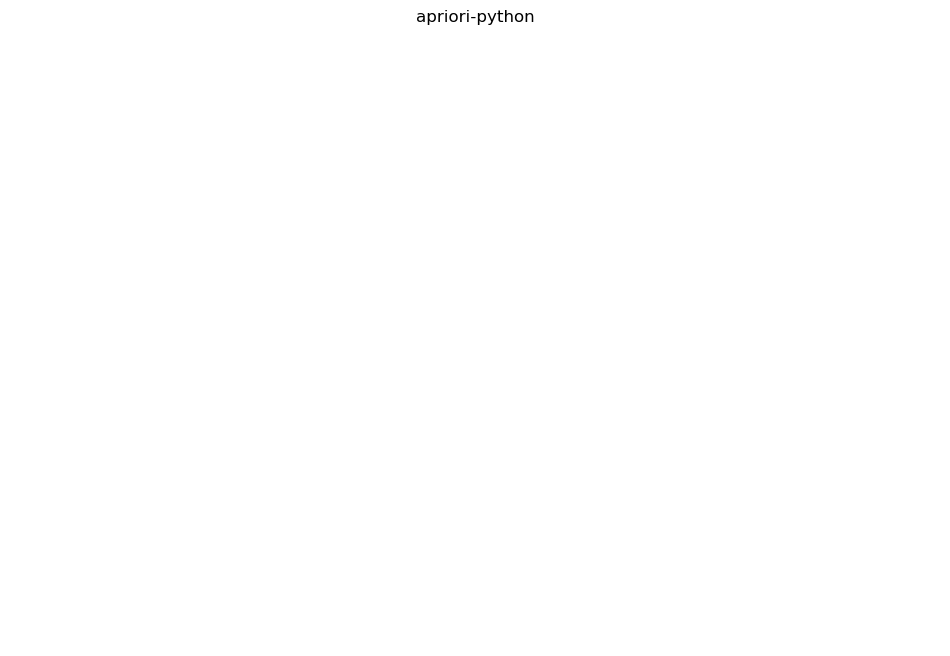

In [85]:
from apriori_python import apriori
start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)

type(freqItemSet)
times['apriori-python'] = time.time() - start


print("\nАссоциативные правила (достоверность ≥ 60%):")
for rule in rules:
    print(rule)

rules_data_ap = []
for r in rules:
    print(r)
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    rules_data_ap.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_ap, title="apriori-python")


Ассоциативные правила (достоверность ≥ 80%):


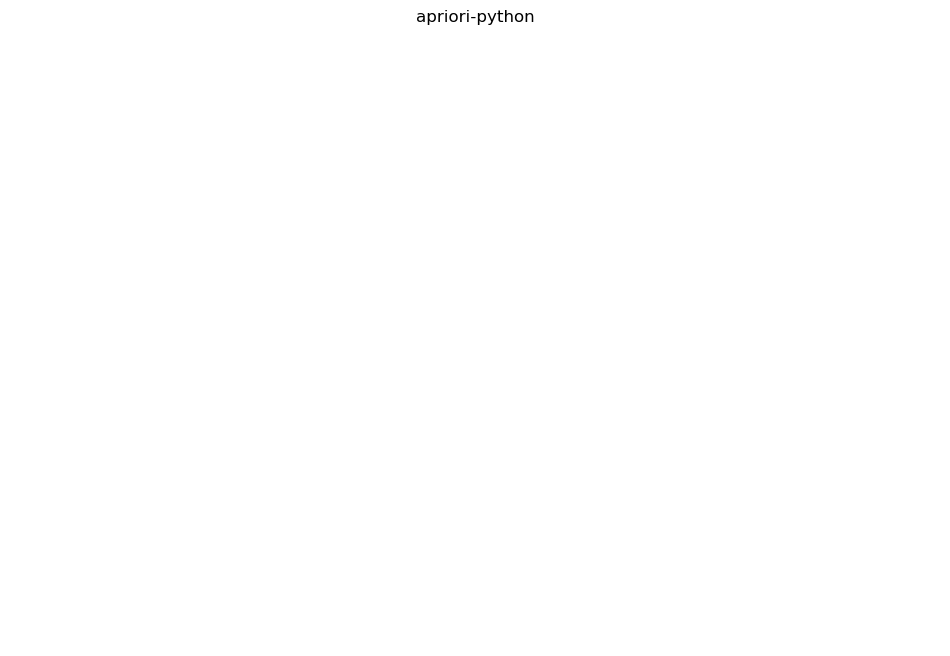

In [78]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)

print("\nАссоциативные правила (достоверность ≥ 80%):")
for rule in rules:
    print(rule)

rules_data_ap = []
for r in rules:
    print(r)
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    rules_data_ap.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_ap, title="apriori-python")


efficient_apriori


Ассоциативные правила (достоверность ≥ 60%):


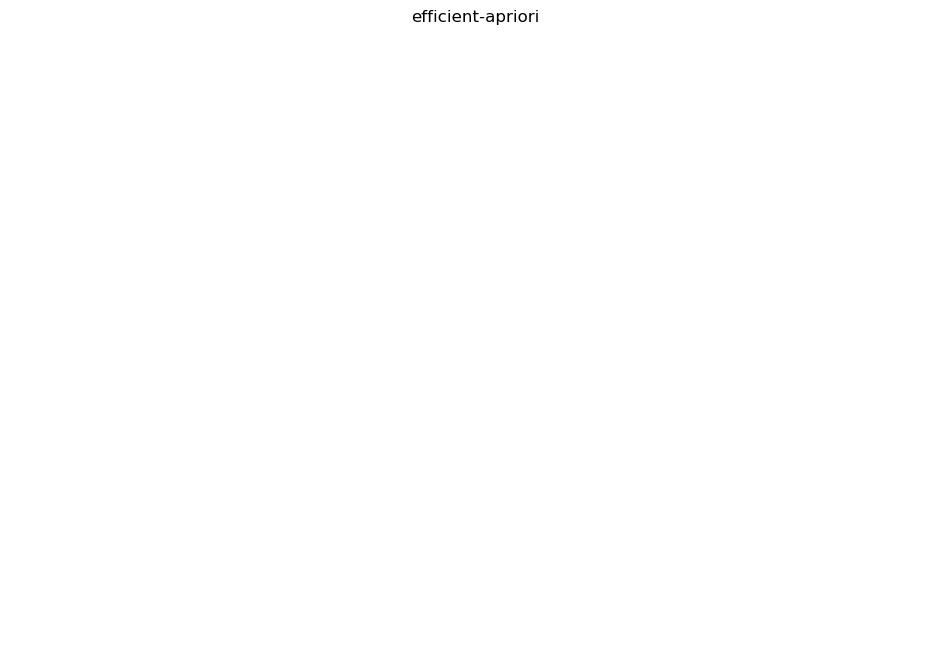

In [79]:
from efficient_apriori import apriori
start = time.time()
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start

print("\nАссоциативные правила (достоверность ≥ 60%):")
for rule in rules:
    print(rule)

rules_data = []
for r in rules:
    rules_data.append({
        'antecedent': tuple(r.lhs),
        'consequent': tuple(r.rhs),
        'support': r.support,
        'confidence': r.confidence
    })

draw_rules_graph(rules_data, title="efficient-apriori")


Ассоциативные правила (достоверность ≥ 80%):


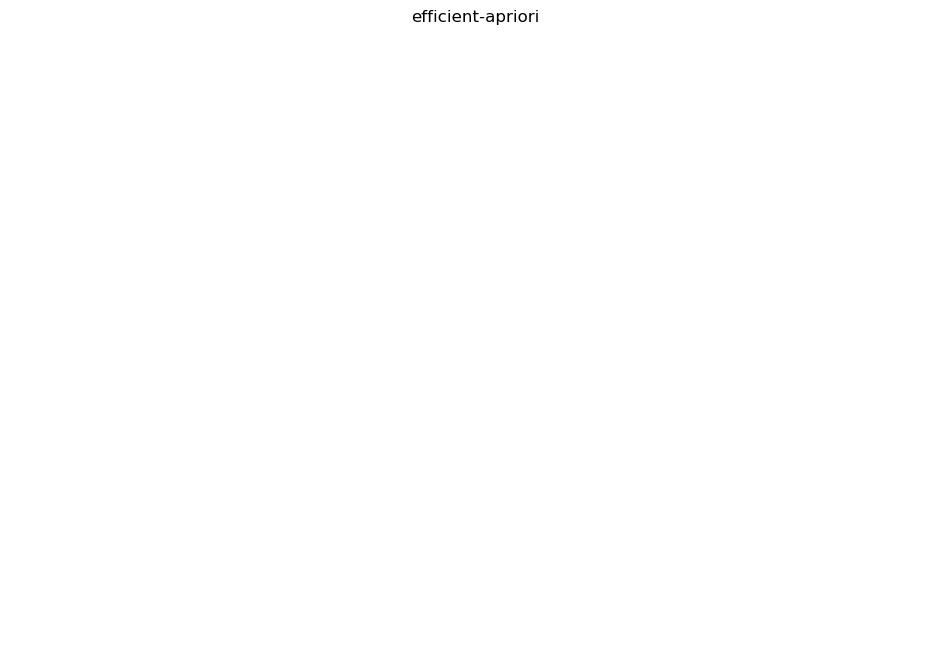

In [80]:
itemsets, rules = apriori(transactions, min_support=min_sup, min_confidence=0.8)

print("\nАссоциативные правила (достоверность ≥ 80%):")
for rule in rules:
    print(rule)

rules_data = []
for r in rules:
    rules_data.append({
        'antecedent': tuple(r.lhs),
        'consequent': tuple(r.rhs),
        'support': r.support,
        'confidence': r.confidence
    })

draw_rules_graph(rules_data, title="efficient-apriori")


fpgrowth_py


Ассоциативные правила (достоверность ≥ 60%):


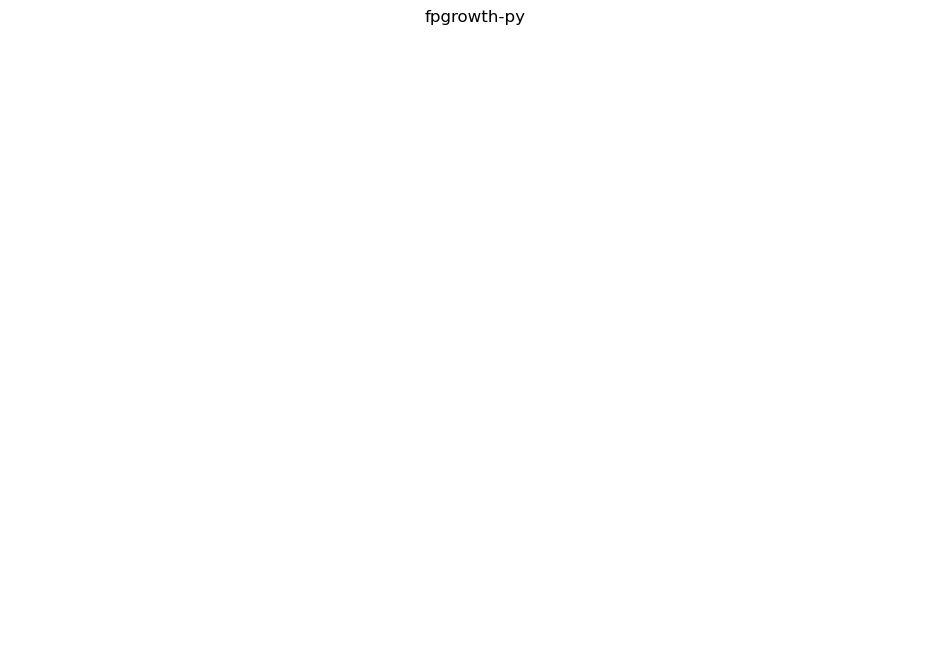

In [81]:
from fpgrowth_py import fpgrowth
start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start

print("\nАссоциативные правила (достоверность ≥ 60%):")
for rule in rules:
    print(rule)

rules_data_fp = []
for r in rules:
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    rules_data_fp.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_fp, title="fpgrowth-py")



Ассоциативные правила (достоверность ≥ 80%):


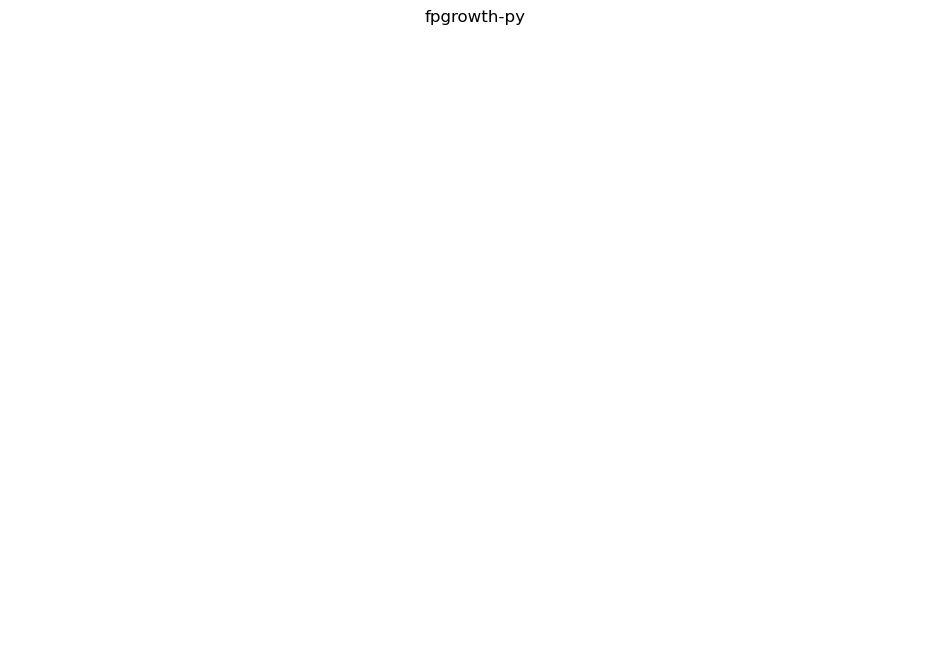

In [82]:
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)


print("\nАссоциативные правила (достоверность ≥ 80%):")
for rule in rules:
    print(rule)

rules_data_fp = []
for r in rules:
    lhs = r[0]
    rhs = r[1]
    conf = r[2]
    rules_data_fp.append({
        'antecedent': tuple(lhs),
        'consequent': tuple(rhs),
        'confidence': conf
    })

draw_rules_graph(rules_data_fp, title="fpgrowth-py")


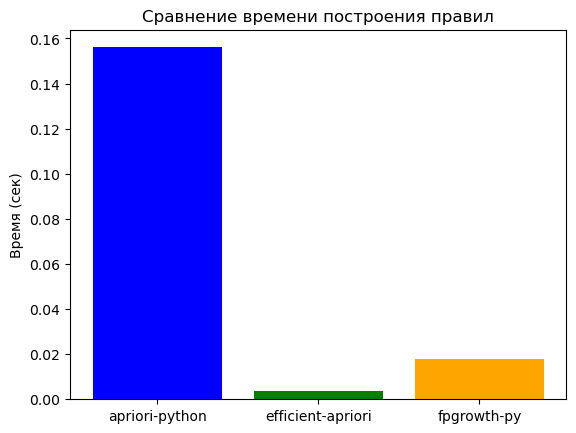

In [83]:
plt.bar(times.keys(), times.values(), color=['blue','green','orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()